# Micro credit project

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


## Loading data

In [2]:
df=pd.read_csv("Data file.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [5]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

label --->target column

# Understanding the Datasets:

label	    --->Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
msisdn	    --->mobile number of user
aon	        ---->age on cellular network in days
daily_decr30--->	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90 --->	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
rental30	 ---> Average main account balance over last 30 days
rental90	 ---> Average main account balance over last 90 days
last_rech_date_ma--->	Number of days till last recharge of main account
last_rech_date_da	--->Number of days till last recharge of data account
last_rech_amt_ma --->Amount of last recharge of main account (in Indonesian Rupiah)
cnt_ma_rech30	 ----> Number of times main account got recharged in last 30 days
fr_ma_rech30	 ----> Frequency of main account recharged in last 30 days
sumamnt_ma_rech30---->	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
medianamnt_ma_rech30---->	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal30 ---->	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
cnt_ma_rech90	---->Number of times main account got recharged in last 90 days
fr_ma_rech90	---->Frequency of main account recharged in last 90 days
sumamnt_ma_rech90---->	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
medianamnt_ma_rech90 ---->	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
medianmarechprebal90---->	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
cnt_da_rech30 ---->	Number of times data account got recharged in last 30 days
fr_da_rech30 ---->	Frequency of data account recharged in last 30 days
cnt_da_rech90 --->Number of times data account got recharged in last 90 days
fr_da_rech90 ---->	Frequency of data account recharged in last 90 days
cnt_loans30 ---->	Number of loans taken by user in last 30 days
amnt_loans30 ---->	Total amount of loans taken by user in last 30 days
maxamnt_loans30 ---->	maximum amount of loan taken by the user in last 30 days
medianamnt_loans30 ---->	Median of amounts of loan taken by the user in last 30 days
cnt_loans90 ---->	Number of loans taken by user in last 90 days
amnt_loans90 ---->	Total amount of loans taken by user in last 90 days
maxamnt_loans90	---->maximum amount of loan taken by the user in last 90 days
medianamnt_loans90 ---->	Median of amounts of loan taken by the user in last 90 days
payback30	---->Average payback time in days over last 30 days
payback90	---->Average payback time in days over last 90 days
pcircle ---->	telecom circle
pdate	----> date


In [6]:
df.drop("pdate", axis=1,inplace=True)

In [7]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle'],
      dtype='object')

In [8]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
dtype: int64

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

label                   0.0
msisdn                  0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle                 0.0
dtype: float64

# Checking unique values

In [10]:
df['label'].unique()

array([0, 1], dtype=int64)

In [11]:
df['msisdn'].unique()
    

array(['21408I70789', '76462I70374', '17943I70372', ..., '22758I85348',
       '59712I82733', '65061I85339'], dtype=object)

In [12]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [13]:
for i, column in enumerate(df.columns):
    #x=df[column].unique()
    #print(df[column],x)   
    print(df[column].value_counts())
    print("_________________________________________________________________")

1    183431
0     26162
Name: label, dtype: int64
_________________________________________________________________
47819I90840    7
04581I85330    7
71742I90843    6
60744I91197    6
43430I70786    6
              ..
87805I70787    1
20932I82738    1
66676I84458    1
95456I85320    1
58732I90580    1
Name: msisdn, Length: 186243, dtype: int64
_________________________________________________________________
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64
_________________________________________________________________
0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
3565.333333       1
596.172000        1
700.126667        1
7604.514667       1
4108.476000       1
Name: daily_decr30, Length: 14702

In [14]:
#Print all of the object data types and their unique values
for column in df.columns:
    #if df[column].dtype == object:
    print(str(column) + ' : ' + str(df[column].unique()))
    print(df[column].value_counts())
    print("_________________________________________________________________")

label : [0 1]
1    183431
0     26162
Name: label, dtype: int64
_________________________________________________________________
msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
47819I90840    7
04581I85330    7
71742I90843    6
60744I91197    6
43430I70786    6
              ..
87805I70787    1
20932I82738    1
66676I84458    1
95456I85320    1
58732I90580    1
Name: msisdn, Length: 186243, dtype: int64
_________________________________________________________________
aon : [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64
_________________________________________________________________
daily_decr30 : [ 3055.05       12122

# Data Visualization

<AxesSubplot:>

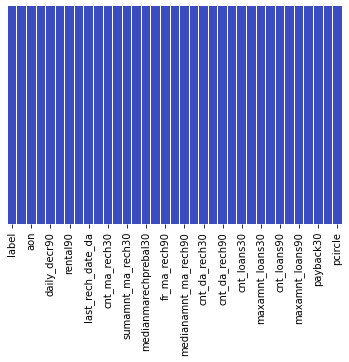

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

import matplotlib.pyplot as plt
rows = 36
columns = 2

fig, axes = plt.subplots(rows,columns, figsize=(30,150))

x, y = 0, 0

for i, column in enumerate(df.columns):
    sns.countplot(x=df[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

UPW    209593
Name: pcircle, dtype: int64


<AxesSubplot:xlabel='pcircle', ylabel='count'>

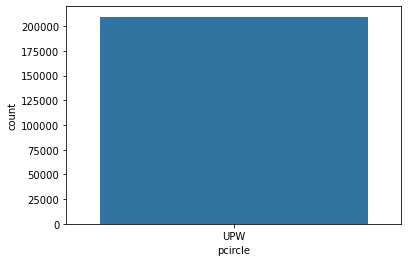

In [16]:
ax=df['pcircle'].value_counts()
print(ax)
sns.countplot(df['pcircle'])

This column has only one value hence we drop this column

In [17]:
df.drop("pcircle", axis=1,inplace=True)

In [18]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [19]:
ax=df['msisdn'].value_counts()
print(ax)
#sns.countplot(df['msisdn'])

47819I90840    7
04581I85330    7
71742I90843    6
60744I91197    6
43430I70786    6
              ..
87805I70787    1
20932I82738    1
66676I84458    1
95456I85320    1
58732I90580    1
Name: msisdn, Length: 186243, dtype: int64


Encoding of 'msisdn' column

In [20]:
lencoder=LabelEncoder()
df['msisdn']=lencoder.fit_transform(df['msisdn'])

In [21]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


<AxesSubplot:xlabel='label', ylabel='Count'>

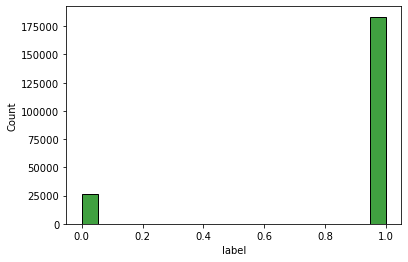

In [22]:
sns.histplot(df['label'],color='green')

1    183431
0     26162
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

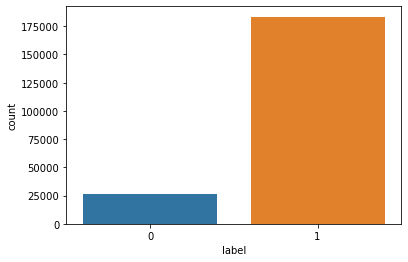

In [23]:
ax=df['label'].value_counts()
print(ax)
sns.countplot(df['label'])

Value counts for label the target column is 
1    183431
0     26162

We need to do imbalancing of data.

<AxesSubplot:xlabel='label', ylabel='msisdn'>

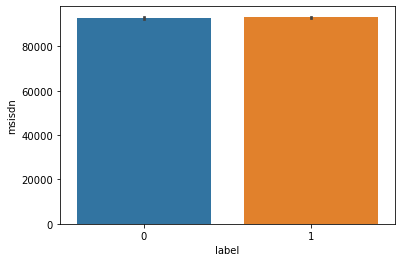

In [24]:
 sns.barplot(x='label',y='msisdn',data=df)

g=sns.catplot(y='primary_fuel',x='geolocation_source',data=df,kind='bar')
plt.show()

for i in df.columns:
    plt.figure()
    sns.histplot(df[i],color='green')

In [25]:
df.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

<AxesSubplot:xlabel='msisdn', ylabel='Density'>

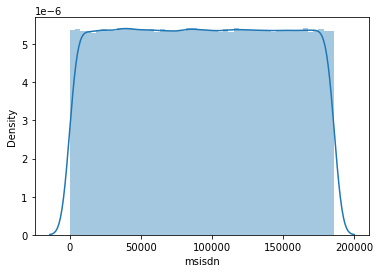

In [26]:
sns.distplot(df['msisdn'],kde=True)

<AxesSubplot:xlabel='aon', ylabel='Density'>

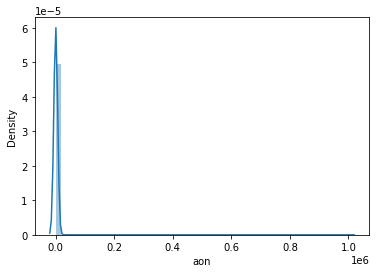

In [27]:
sns.distplot(df['aon'],kde=True)

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

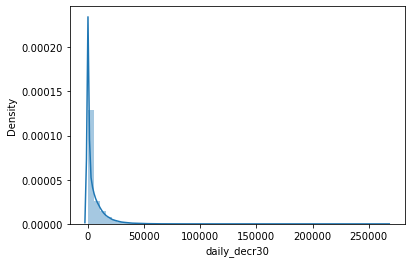

In [28]:
sns.distplot(df['daily_decr30'],kde=True)

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

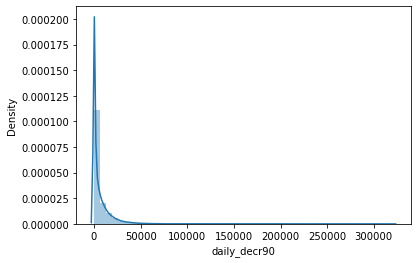

In [29]:
sns.distplot(df['daily_decr90'],kde=True)

<AxesSubplot:xlabel='rental30', ylabel='Density'>

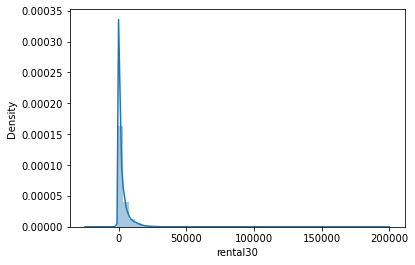

In [30]:
sns.distplot(df['rental30'],kde=True)

<AxesSubplot:xlabel='rental90', ylabel='Density'>

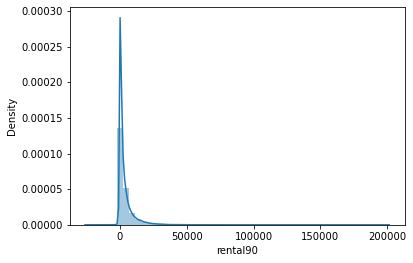

In [31]:
sns.distplot(df['rental90'],kde=True)

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

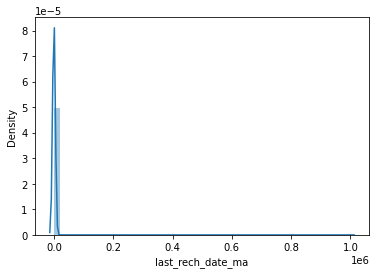

In [32]:
sns.distplot(df['last_rech_date_ma'],kde=True)

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

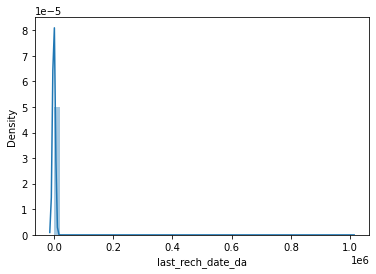

In [33]:
sns.distplot(df['last_rech_date_da'],kde=True)

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

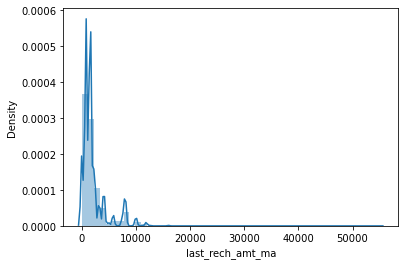

In [34]:
sns.distplot(df['last_rech_amt_ma'],kde=True)

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='Density'>

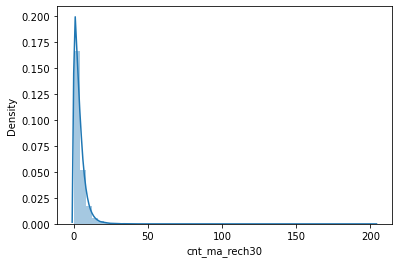

In [35]:
sns.distplot(df['cnt_ma_rech30'],kde=True)

<AxesSubplot:xlabel='fr_ma_rech30', ylabel='Density'>

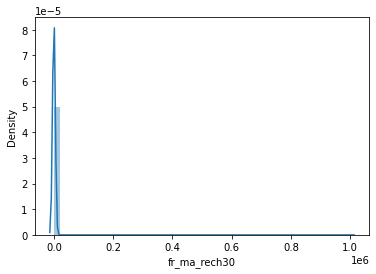

In [36]:
sns.distplot(df['fr_ma_rech30'],kde=True)

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

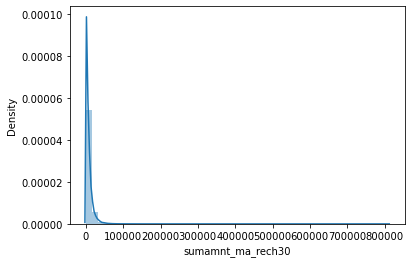

In [37]:
sns.distplot(df['sumamnt_ma_rech30'],kde=True)

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

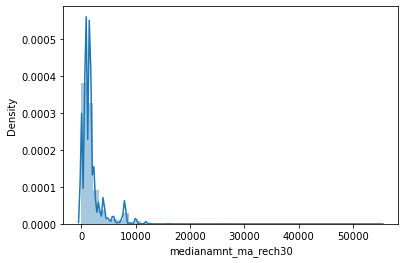

In [38]:
sns.distplot(df['medianamnt_ma_rech30'],kde=True)

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

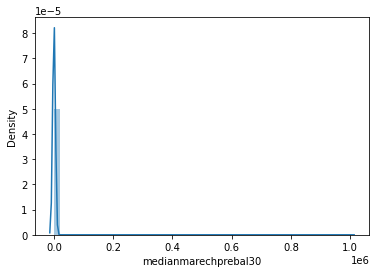

In [39]:
sns.distplot(df['medianmarechprebal30'],kde=True)

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

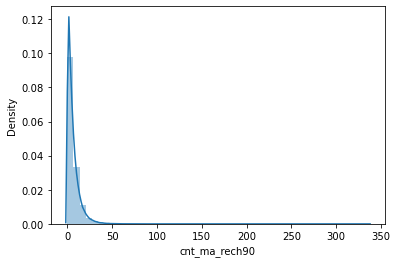

In [40]:
sns.distplot(df['cnt_ma_rech90'],kde=True)

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

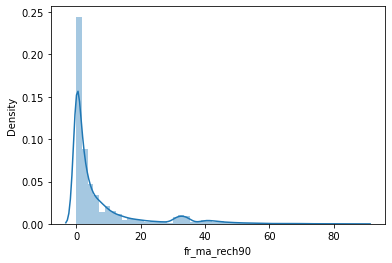

In [41]:
sns.distplot(df['fr_ma_rech90'],kde=True)

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

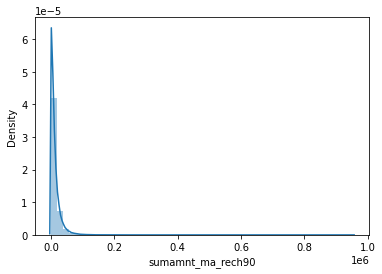

In [42]:
sns.distplot(df['sumamnt_ma_rech90'],kde=True)

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='Density'>

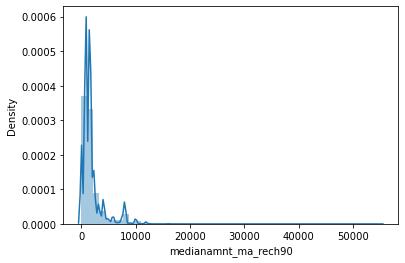

In [43]:
sns.distplot(df['medianamnt_ma_rech90'],kde=True)

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

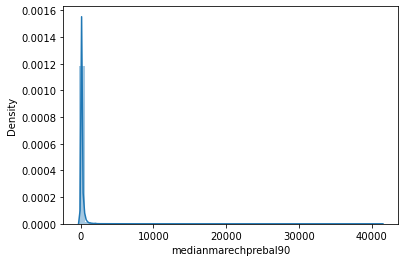

In [44]:
sns.distplot(df['medianmarechprebal90'],kde=True)

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

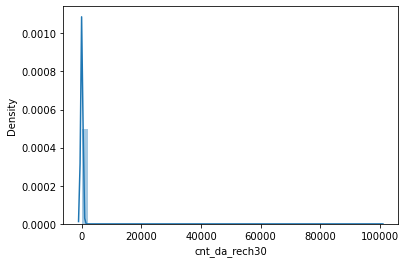

In [45]:
sns.distplot(df['cnt_da_rech30'],kde=True)

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

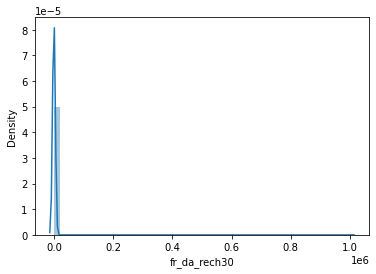

In [46]:
sns.distplot(df['fr_da_rech30'],kde=True)

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

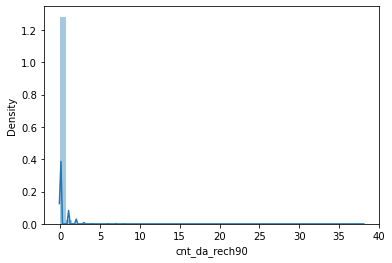

In [47]:
sns.distplot(df['cnt_da_rech90'],kde=True)

<AxesSubplot:xlabel='fr_da_rech90', ylabel='Density'>

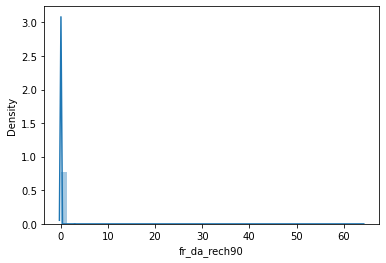

In [48]:
sns.distplot(df['fr_da_rech90'],kde=True)

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

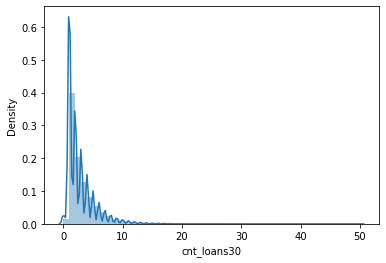

In [49]:
sns.distplot(df['cnt_loans30'],kde=True)

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

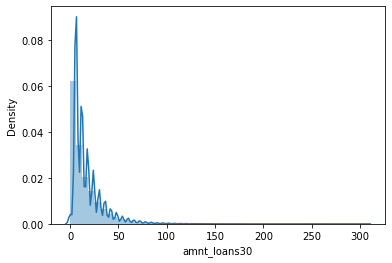

In [50]:
sns.distplot(df['amnt_loans30'],kde=True)

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

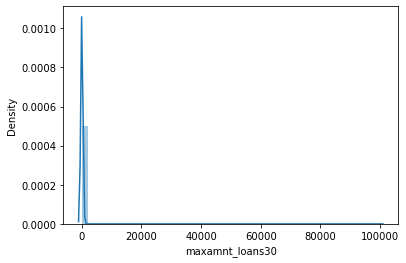

In [51]:
sns.distplot(df['maxamnt_loans30'],kde=True)

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='Density'>

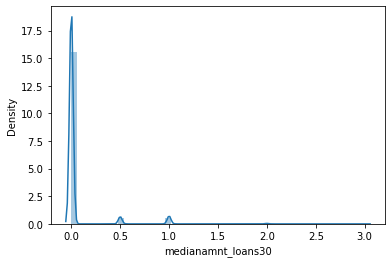

In [52]:
sns.distplot(df['medianamnt_loans30'],kde=True)

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

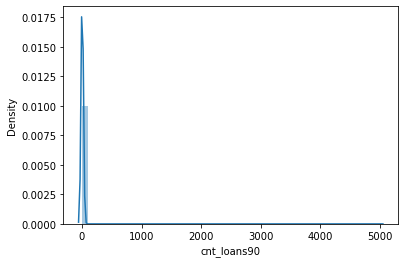

In [53]:
sns.distplot(df['cnt_loans90'],kde=True)

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

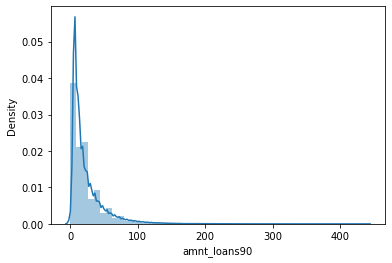

In [54]:
sns.distplot(df['amnt_loans90'],kde=True)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

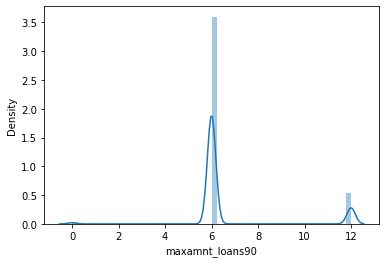

In [55]:
sns.distplot(df['maxamnt_loans90'],kde=True)

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='Density'>

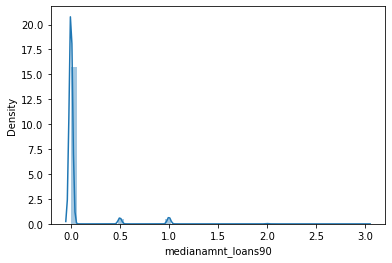

In [56]:
sns.distplot(df['medianamnt_loans90'],kde=True)

<AxesSubplot:xlabel='payback30', ylabel='Density'>

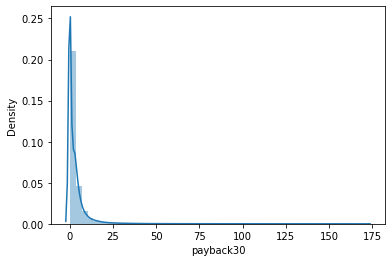

In [57]:
sns.distplot(df['payback30'],kde=True)

<AxesSubplot:xlabel='payback90', ylabel='Density'>

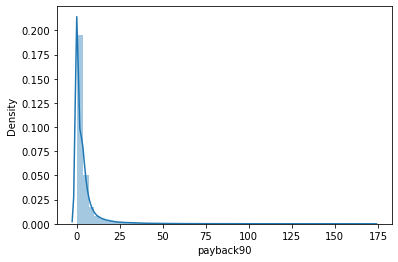

In [58]:
sns.distplot(df['payback90'],kde=True)

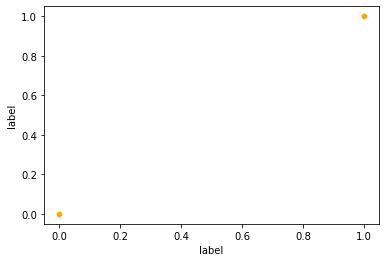

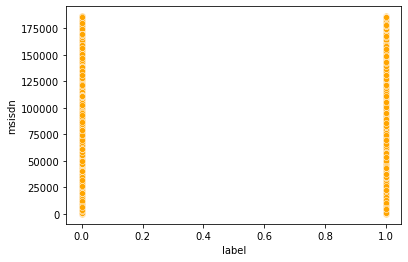

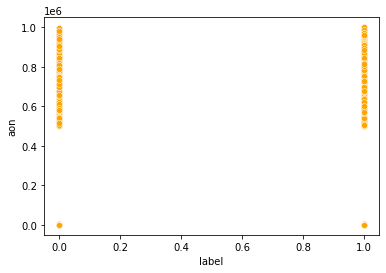

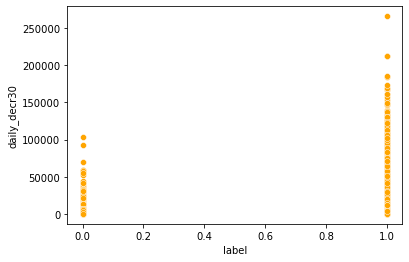

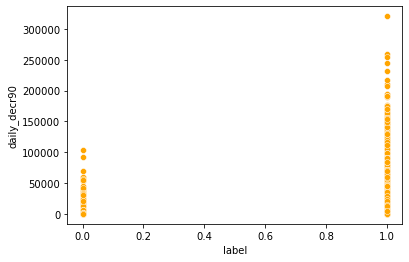

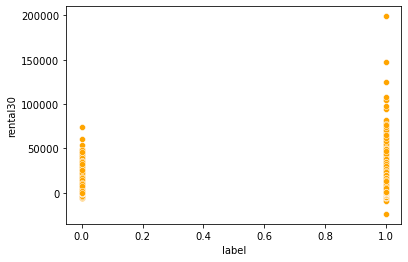

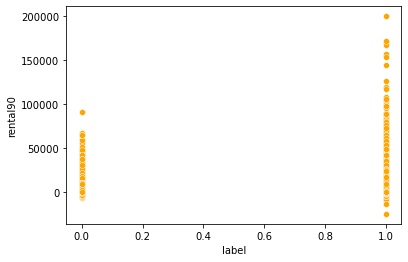

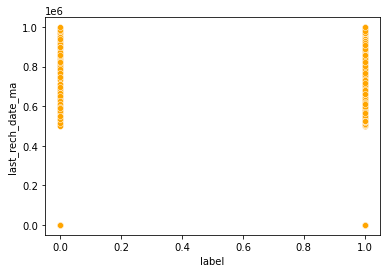

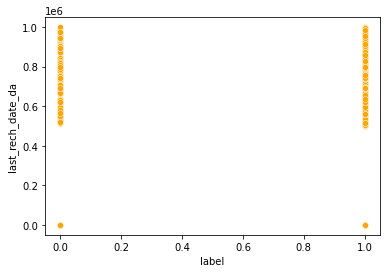

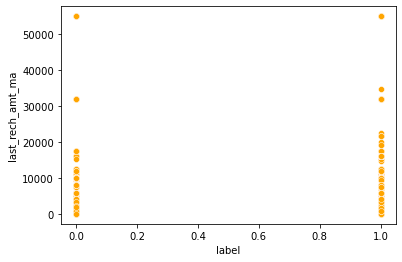

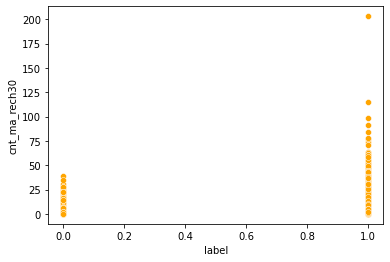

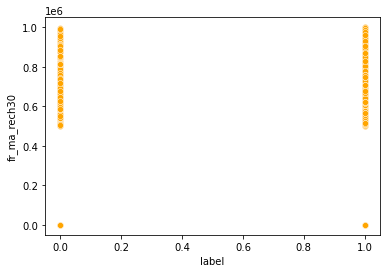

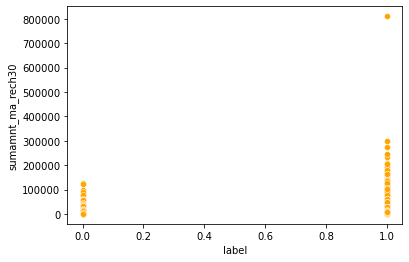

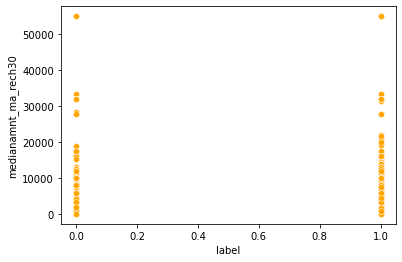

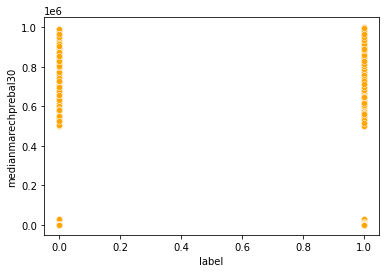

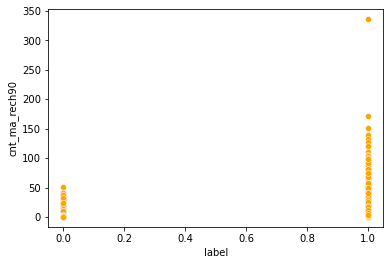

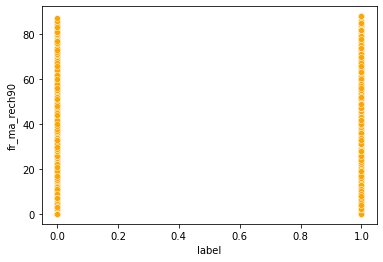

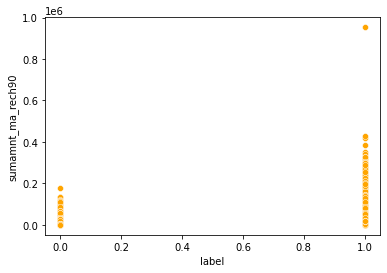

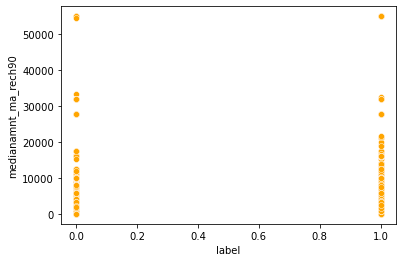

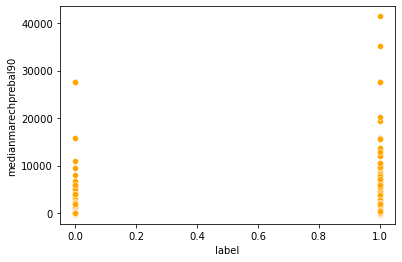

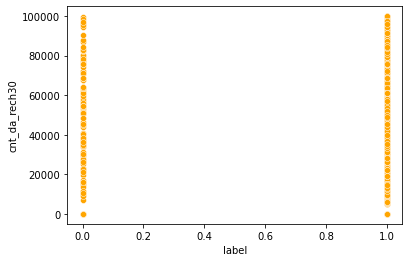

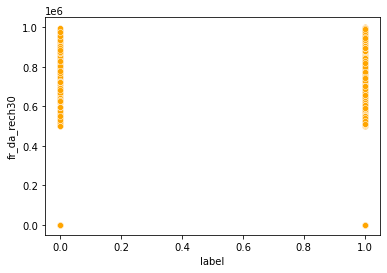

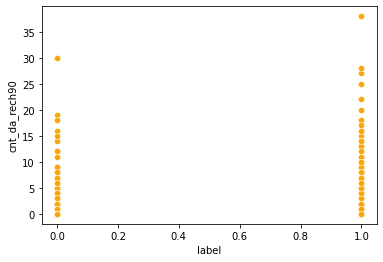

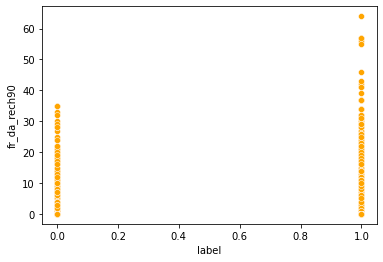

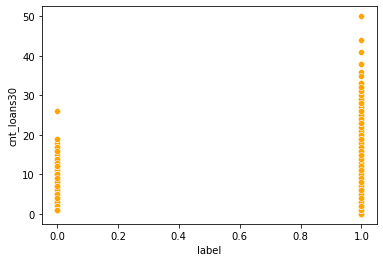

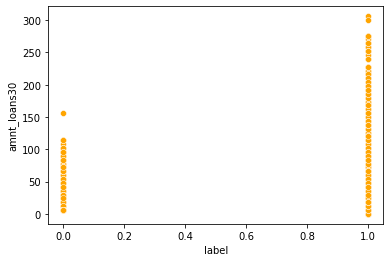

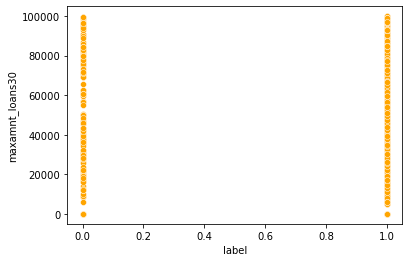

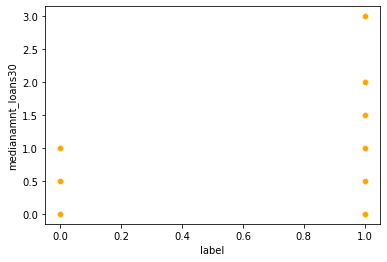

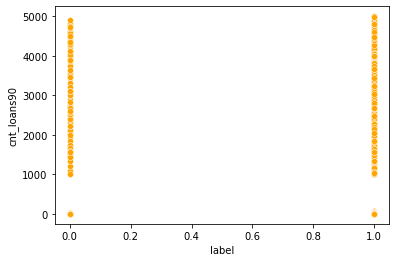

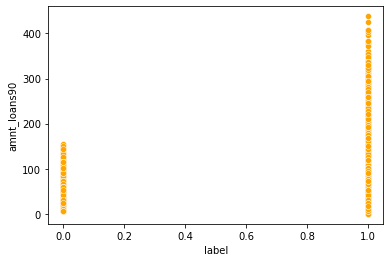

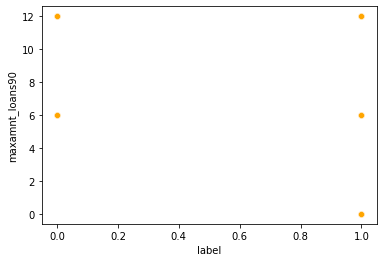

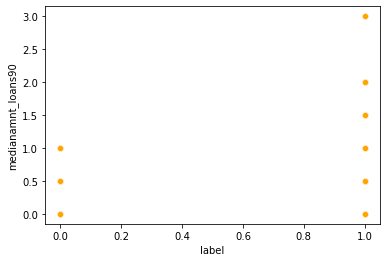

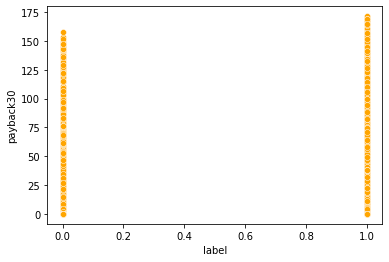

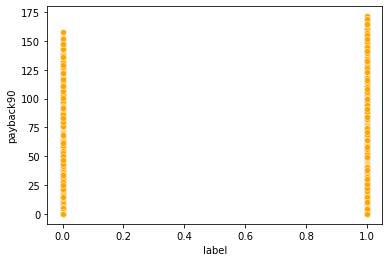

In [59]:
for i in df.columns:
    plt.figure()
    sns.scatterplot(x='label',y=df[i],data=df,color='orange')

# Describe the dataset

In [60]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,186242.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


too much difference between 75th percentile and maximum value of the columns
aon,last_rech_date_ma, last_rech_date_da, cnt_loans30, amnt_loans30, maxamnt_loans30,
cnt_loans90, amnt_loans90, payback30, payback90

<AxesSubplot:>

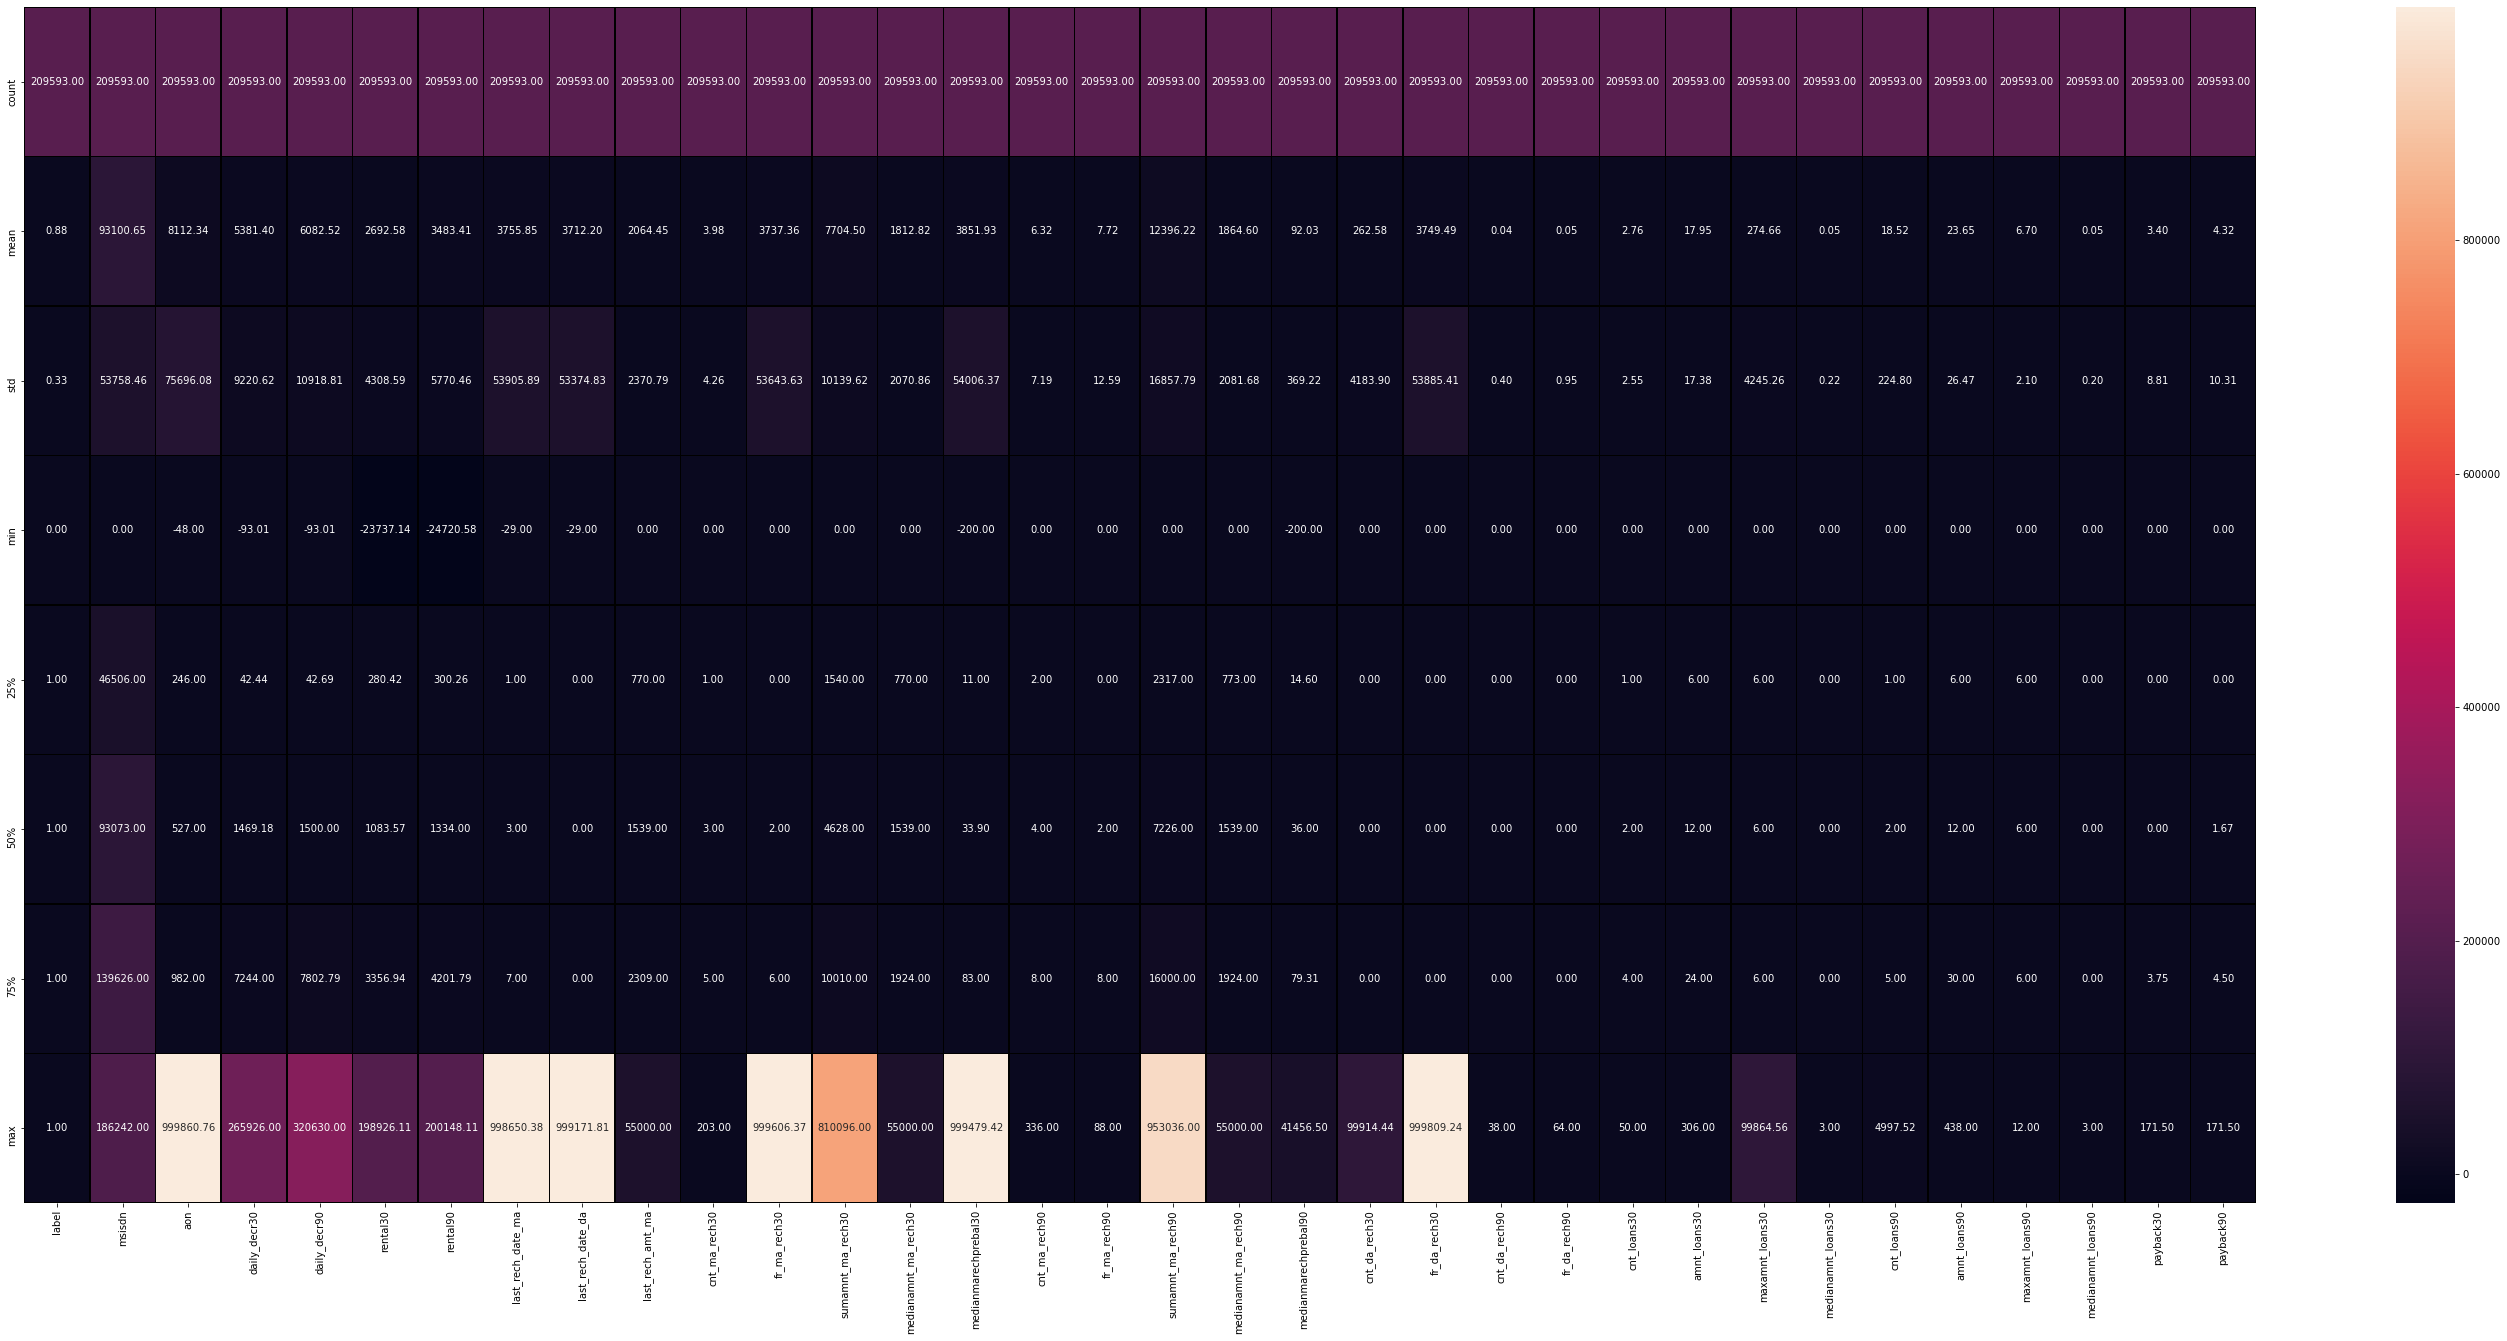

In [61]:
plt.figure(figsize=(50,22))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

# Correlation of the columns with the target columns

In [62]:
df.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.001976,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
msisdn,0.001976,1.000000,0.000566,0.000717,0.000950,-0.001404,-0.000691,-0.000928,0.001400,-0.002368,...,0.001765,0.002170,-0.000755,0.000986,0.001859,-0.000155,0.003286,0.001210,0.002922,0.002671
aon,-0.003785,0.000566,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.000717,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000950,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.001404,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000691,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,-0.000928,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,0.001400,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,-0.002368,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


fr_da_rech30--->-	-0.000027, maxamnt_loans30	0.000248 we drop this column

In [63]:
df.drop("fr_da_rech30", axis=1,inplace=True)

In [64]:
df.drop("maxamnt_loans30", axis=1,inplace=True)

<AxesSubplot:>

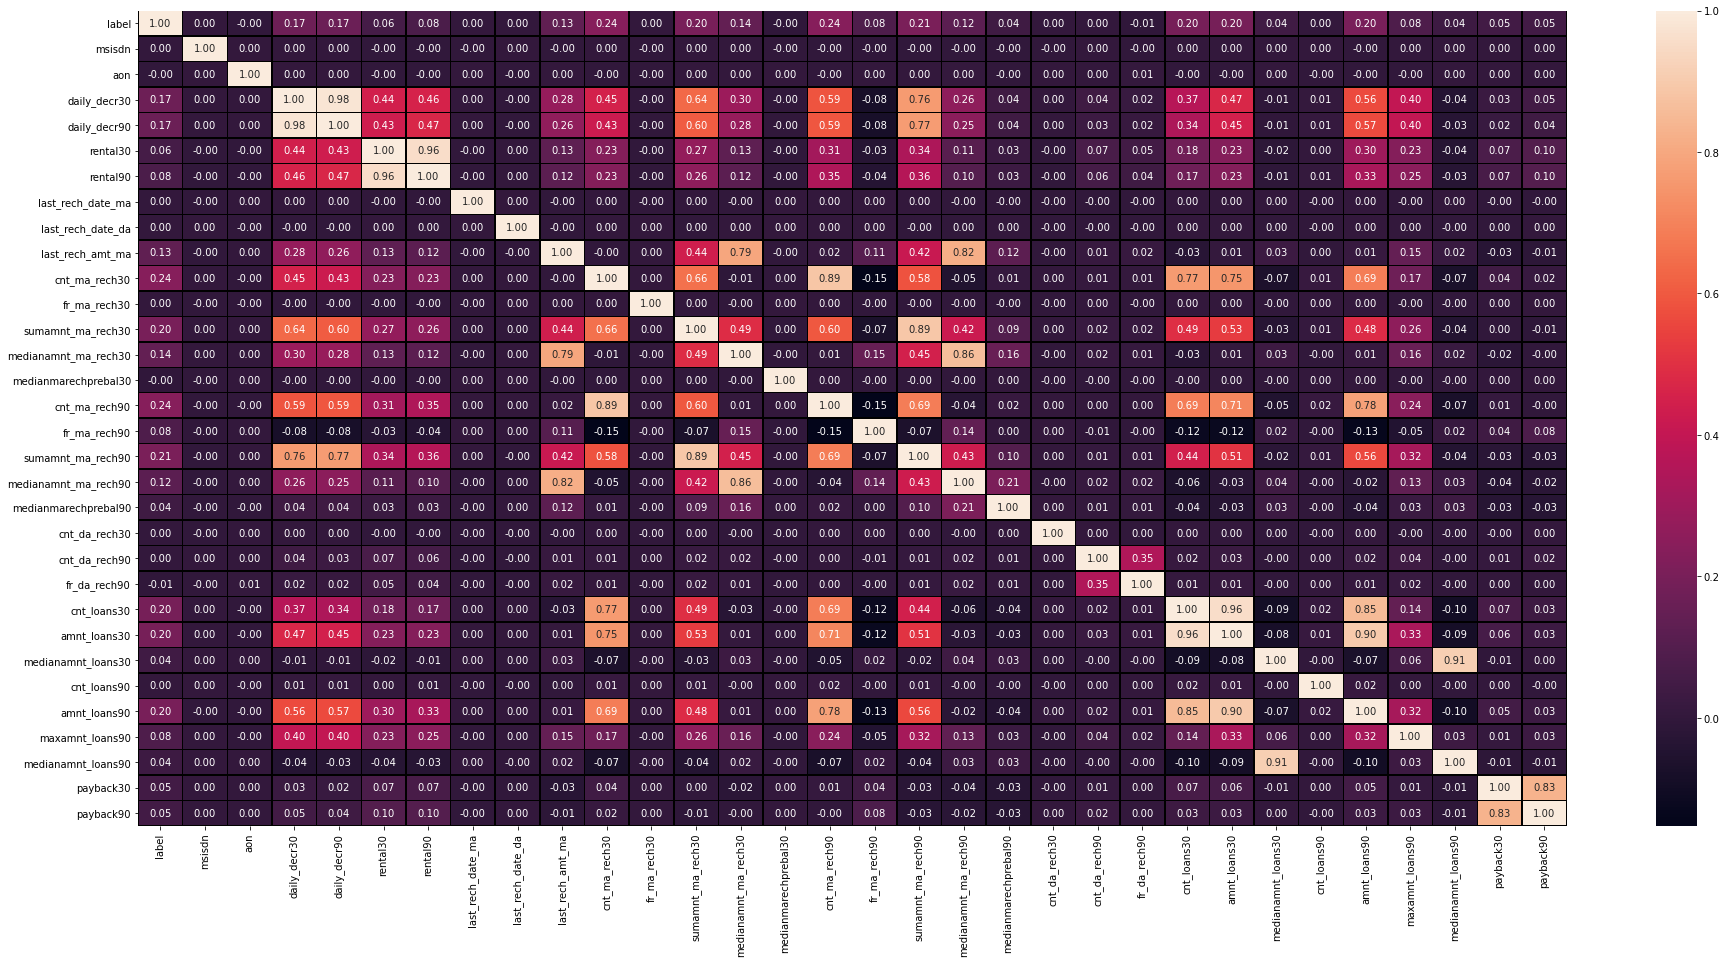

In [65]:
plt.figure(figsize=(32,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


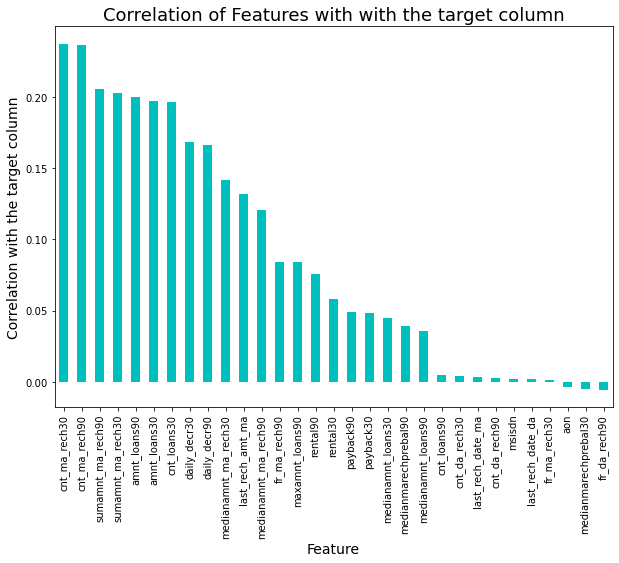

In [66]:
plt.figure(figsize=(10,7))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


multi collinearity is present hence we have to remove it.

In [67]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0,2,12,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0,1,12,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0,1,6,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0,2,12,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0,7,42,0.0,7.0,42,6,0.0,2.333333,2.333333


In [68]:
dfy1=df.iloc[:,0:1]
dfy1

,label
0,0
1,1
2,1
3,1
4,1
...,...
209588,1
209589,1
209590,1
209591,1


In [69]:
dfx1=df.copy()
dfx1.drop("label",axis=1,inplace=True)
dfx1

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0,2,12,0.0,2.0,12,6,0.0,29.000000,29.000000
1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0,1,12,0.0,1.0,12,12,0.0,0.000000,0.000000
2,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0,1,6,0.0,1.0,6,6,0.0,0.000000,0.000000
3,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0,2,12,0.0,2.0,12,6,0.0,0.000000,0.000000
4,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0,7,42,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0,2,12,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0,3,18,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,53995,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0,4,42,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0,2,18,0.0,3.0,24,12,0.0,0.000000,10.500000


In [70]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [72]:
calc_vif(dfx1)

,variables,VIF_Factor
0,msisdn,3.499241
1,aon,1.011149
2,daily_decr30,38.963988
3,daily_decr90,41.896290
4,rental30,18.261537
5,rental90,18.833303
6,last_rech_date_ma,1.004771
7,last_rech_date_da,1.004821
8,last_rech_amt_ma,6.028942
9,cnt_ma_rech30,28.083574


amnt_loans30---->	46.971173 is having high vif we have to drop it.

In [73]:
dfx1.drop("amnt_loans30", axis=1,inplace=True)

In [74]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [75]:
calc_vif(dfx1)

,variables,VIF_Factor
0,msisdn,3.361946
1,aon,1.011046
2,daily_decr30,38.601681
3,daily_decr90,41.813791
4,rental30,18.255792
5,rental90,18.832525
6,last_rech_date_ma,1.004715
7,last_rech_date_da,1.004787
8,last_rech_amt_ma,6.026970
9,cnt_ma_rech30,27.381323


daily_decr90	41.813791 havind high vif so drop it.

In [76]:
dfx1.drop("daily_decr90", axis=1,inplace=True)

In [77]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [78]:
calc_vif(dfx1)

,variables,VIF_Factor
0,msisdn,3.360143
1,aon,1.011038
2,daily_decr30,4.048580
3,rental30,17.204046
4,rental90,17.671091
5,last_rech_date_ma,1.004704
6,last_rech_date_da,1.004786
7,last_rech_amt_ma,6.026847
8,cnt_ma_rech30,27.315496
9,fr_ma_rech30,1.004649


cnt_ma_rech30--->	27.315496 is having high vif so we have to drop it.

In [79]:
dfx1.drop("cnt_ma_rech30", axis=1,inplace=True)

In [80]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [81]:
calc_vif(dfx1)

,variables,VIF_Factor
0,msisdn,3.357180
1,aon,1.011025
2,daily_decr30,4.047762
3,rental30,17.146564
4,rental90,17.610355
5,last_rech_date_ma,1.004704
6,last_rech_date_da,1.004786
7,last_rech_amt_ma,5.994958
8,fr_ma_rech30,1.004647
9,sumamnt_ma_rech30,11.217133


# Skewness

In [82]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

From the above observation all the columns falls under high skewness except latitude and primary_fuel hence we need to remove the skewness

# Now we use subplot and displot to check data are normalised or not

In [83]:
dfx1.columns

Index(['msisdn', 'aon', 'daily_decr30', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

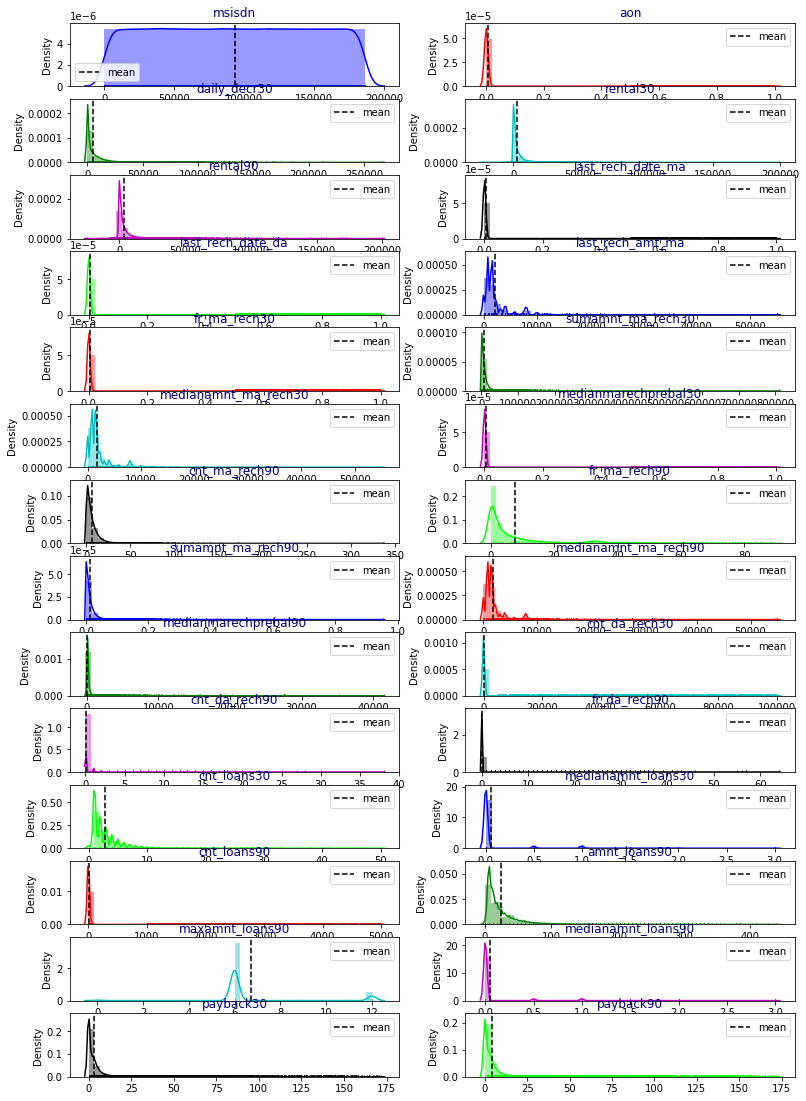

In [84]:
import itertools

cols = ['msisdn', 'aon', 'daily_decr30', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","b","r"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(18,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

from above plot it is observed that data is not normalized.

# Outliers Check:

label                      AxesSubplot(0.125,0.787927;0.110714x0.0920732)
msisdn                  AxesSubplot(0.257857,0.787927;0.110714x0.0920732)
aon                     AxesSubplot(0.390714,0.787927;0.110714x0.0920732)
daily_decr30            AxesSubplot(0.523571,0.787927;0.110714x0.0920732)
daily_decr90            AxesSubplot(0.656429,0.787927;0.110714x0.0920732)
rental30                AxesSubplot(0.789286,0.787927;0.110714x0.0920732)
rental90                   AxesSubplot(0.125,0.677439;0.110714x0.0920732)
last_rech_date_ma       AxesSubplot(0.257857,0.677439;0.110714x0.0920732)
last_rech_date_da       AxesSubplot(0.390714,0.677439;0.110714x0.0920732)
last_rech_amt_ma        AxesSubplot(0.523571,0.677439;0.110714x0.0920732)
cnt_ma_rech30           AxesSubplot(0.656429,0.677439;0.110714x0.0920732)
fr_ma_rech30            AxesSubplot(0.789286,0.677439;0.110714x0.0920732)
sumamnt_ma_rech30          AxesSubplot(0.125,0.566951;0.110714x0.0920732)
medianamnt_ma_rech30    AxesSubplot(0.

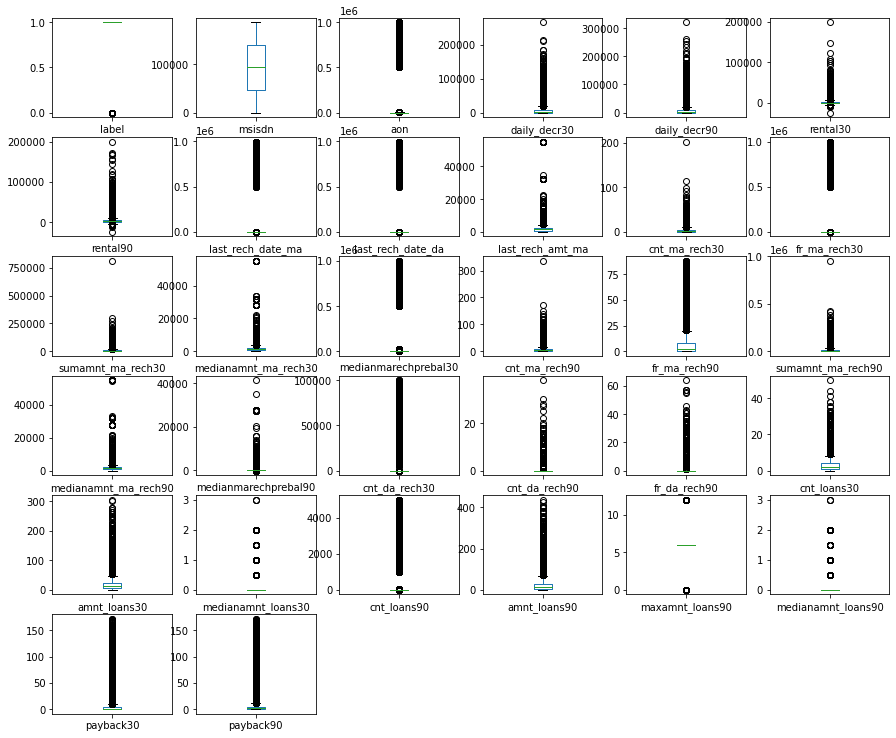

In [85]:
df.plot(kind = 'box',figsize = (15,15),layout = (7,6),sharex = False, subplots = True)

from the above plot it is observed that outliers are present

# Outliers Removal

In [86]:
dfx1

,msisdn,aon,daily_decr30,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,40191,272.0,3055.050000,220.13,260.13,2.0,0.0,1539,21.0,3078.0,...,0,0,2,0.0,2.0,12,6,0.0,29.000000,29.000000
1,142291,712.0,12122.000000,3691.26,3691.26,20.0,0.0,5787,0.0,5787.0,...,0,0,1,0.0,1.0,12,12,0.0,0.000000,0.000000
2,33594,535.0,1398.000000,900.13,900.13,3.0,0.0,1539,0.0,1539.0,...,0,0,1,0.0,1.0,6,6,0.0,0.000000,0.000000
3,104157,241.0,21.228000,159.42,159.42,41.0,0.0,947,0.0,0.0,...,0,0,2,0.0,2.0,12,6,0.0,0.000000,0.000000
4,6910,947.0,150.619333,1098.90,1098.90,4.0,0.0,2309,2.0,20029.0,...,0,0,7,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,1089.19,1089.19,1.0,0.0,4048,2.0,10404.0,...,0,0,2,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,178248,1075.0,36.936000,1728.36,1728.36,4.0,0.0,773,1.0,3092.0,...,0,0,3,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,53995,1013.0,11843.111667,5861.83,8893.20,3.0,0.0,1539,8.0,9334.0,...,0,0,4,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,111388,1732.0,12488.228333,411.83,984.58,2.0,38.0,773,4.0,12154.0,...,1,0,2,0.0,3.0,24,12,0.0,0.000000,10.500000


In [87]:
dfx1['label'] = dfy1
dfx1

,msisdn,aon,daily_decr30,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
0,40191,272.0,3055.050000,220.13,260.13,2.0,0.0,1539,21.0,3078.0,...,0,2,0.0,2.0,12,6,0.0,29.000000,29.000000,0
1,142291,712.0,12122.000000,3691.26,3691.26,20.0,0.0,5787,0.0,5787.0,...,0,1,0.0,1.0,12,12,0.0,0.000000,0.000000,1
2,33594,535.0,1398.000000,900.13,900.13,3.0,0.0,1539,0.0,1539.0,...,0,1,0.0,1.0,6,6,0.0,0.000000,0.000000,1
3,104157,241.0,21.228000,159.42,159.42,41.0,0.0,947,0.0,0.0,...,0,2,0.0,2.0,12,6,0.0,0.000000,0.000000,1
4,6910,947.0,150.619333,1098.90,1098.90,4.0,0.0,2309,2.0,20029.0,...,0,7,0.0,7.0,42,6,0.0,2.333333,2.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,1089.19,1089.19,1.0,0.0,4048,2.0,10404.0,...,0,2,0.0,2.0,12,6,0.0,1.000000,1.000000,1
209589,178248,1075.0,36.936000,1728.36,1728.36,4.0,0.0,773,1.0,3092.0,...,0,3,0.0,3.0,18,6,0.0,1.000000,1.000000,1
209590,53995,1013.0,11843.111667,5861.83,8893.20,3.0,0.0,1539,8.0,9334.0,...,0,4,0.0,6.0,54,12,0.0,4.000000,3.833333,1
209591,111388,1732.0,12488.228333,411.83,984.58,2.0,38.0,773,4.0,12154.0,...,0,2,0.0,3.0,24,12,0.0,0.000000,10.500000,1


In [88]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dfx1))
threshold=3
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([13, 13, 27, ..., 23, 21, 25], dtype=int64))

In [89]:
dfx1_new=dfx1[(z<3).all(axis=1)]
dfx1_new

,msisdn,aon,daily_decr30,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
0,40191,272.0,3055.050000,220.13,260.13,2.0,0.0,1539,21.0,3078.0,...,0,2,0.0,2.0,12,6,0.0,29.000000,29.000000,0
1,142291,712.0,12122.000000,3691.26,3691.26,20.0,0.0,5787,0.0,5787.0,...,0,1,0.0,1.0,12,12,0.0,0.000000,0.000000,1
2,33594,535.0,1398.000000,900.13,900.13,3.0,0.0,1539,0.0,1539.0,...,0,1,0.0,1.0,6,6,0.0,0.000000,0.000000,1
3,104157,241.0,21.228000,159.42,159.42,41.0,0.0,947,0.0,0.0,...,0,2,0.0,2.0,12,6,0.0,0.000000,0.000000,1
4,6910,947.0,150.619333,1098.90,1098.90,4.0,0.0,2309,2.0,20029.0,...,0,7,0.0,7.0,42,6,0.0,2.333333,2.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,1089.19,1089.19,1.0,0.0,4048,2.0,10404.0,...,0,2,0.0,2.0,12,6,0.0,1.000000,1.000000,1
209589,178248,1075.0,36.936000,1728.36,1728.36,4.0,0.0,773,1.0,3092.0,...,0,3,0.0,3.0,18,6,0.0,1.000000,1.000000,1
209590,53995,1013.0,11843.111667,5861.83,8893.20,3.0,0.0,1539,8.0,9334.0,...,0,4,0.0,6.0,54,12,0.0,4.000000,3.833333,1
209591,111388,1732.0,12488.228333,411.83,984.58,2.0,38.0,773,4.0,12154.0,...,0,2,0.0,3.0,24,12,0.0,0.000000,10.500000,1


# Percentage loss of data

In [90]:
percentage_loss=((209593-164146)/209593)*100
print(percentage_loss)

21.68345316876041


Since percentage data loss os more than 10% so proceed with IQR method

In [91]:
dfx1.shape

(209593, 29)

In [92]:
dfx1

,msisdn,aon,daily_decr30,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech90,cnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
0,40191,272.0,3055.050000,220.13,260.13,2.0,0.0,1539,21.0,3078.0,...,0,2,0.0,2.0,12,6,0.0,29.000000,29.000000,0
1,142291,712.0,12122.000000,3691.26,3691.26,20.0,0.0,5787,0.0,5787.0,...,0,1,0.0,1.0,12,12,0.0,0.000000,0.000000,1
2,33594,535.0,1398.000000,900.13,900.13,3.0,0.0,1539,0.0,1539.0,...,0,1,0.0,1.0,6,6,0.0,0.000000,0.000000,1
3,104157,241.0,21.228000,159.42,159.42,41.0,0.0,947,0.0,0.0,...,0,2,0.0,2.0,12,6,0.0,0.000000,0.000000,1
4,6910,947.0,150.619333,1098.90,1098.90,4.0,0.0,2309,2.0,20029.0,...,0,7,0.0,7.0,42,6,0.0,2.333333,2.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,1089.19,1089.19,1.0,0.0,4048,2.0,10404.0,...,0,2,0.0,2.0,12,6,0.0,1.000000,1.000000,1
209589,178248,1075.0,36.936000,1728.36,1728.36,4.0,0.0,773,1.0,3092.0,...,0,3,0.0,3.0,18,6,0.0,1.000000,1.000000,1
209590,53995,1013.0,11843.111667,5861.83,8893.20,3.0,0.0,1539,8.0,9334.0,...,0,4,0.0,6.0,54,12,0.0,4.000000,3.833333,1
209591,111388,1732.0,12488.228333,411.83,984.58,2.0,38.0,773,4.0,12154.0,...,0,2,0.0,3.0,24,12,0.0,0.000000,10.500000,1


In [93]:
Q1=dfx1.quantile(0.25)
Q3=dfx1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

msisdn                  93120.00
aon                       736.00
daily_decr30             7201.56
rental30                 3076.52
rental90                 3901.53
last_rech_date_ma           6.00
last_rech_date_da           0.00
last_rech_amt_ma         1539.00
fr_ma_rech30                6.00
sumamnt_ma_rech30        8470.00
medianamnt_ma_rech30     1154.00
medianmarechprebal30       72.00
cnt_ma_rech90               6.00
fr_ma_rech90                8.00
sumamnt_ma_rech90       13683.00
medianamnt_ma_rech90     1151.00
medianmarechprebal90       64.71
cnt_da_rech30               0.00
cnt_da_rech90               0.00
fr_da_rech90                0.00
cnt_loans30                 3.00
medianamnt_loans30          0.00
cnt_loans90                 4.00
amnt_loans90               24.00
maxamnt_loans90             0.00
medianamnt_loans90          0.00
payback30                   3.75
payback90                   4.50
label                       0.00
dtype: float64


In [94]:
dfx1_new1=dfx1[~((dfx1< (Q1- 1.5* IQR) | (dfx1> (Q3 + 1.5 * IQR))).any(axis=1))]
print(dfx1_new1.shape)

(76343, 29)


In [95]:
percentage_loss=((209593-76343)/209593)*100
print(percentage_loss)

63.575596513242324


Since the data loss is huge so we take original dfx1 .

# Sparating the target and feature column

In [96]:
feature=dfx1.drop("label",axis=1)
target=dfx1["label"]
x=feature
y=target

In [97]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

# Removing skewness of train dataset by transforming data

In [98]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling the data using the min max scaler

In [99]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[2.15799873e-01, 3.20029201e-04, 1.18339762e-02, ...,
        0.00000000e+00, 1.69096210e-01, 1.69096210e-01],
       [7.64011340e-01, 7.60069352e-04, 4.59178182e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80378218e-01, 5.83053201e-04, 5.60491016e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.89918493e-01, 1.06109682e-03, 4.48694408e-02, ...,
        0.00000000e+00, 2.33236152e-02, 2.23517979e-02],
       [5.98082065e-01, 1.78016243e-03, 4.72945181e-02, ...,
        0.00000000e+00, 0.00000000e+00, 6.12244898e-02],
       [6.51104477e-01, 1.62914865e-03, 1.72257412e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

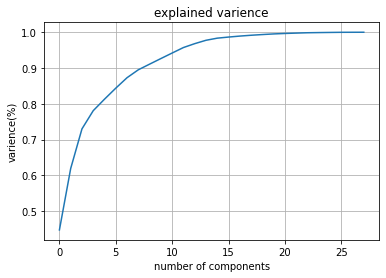

In [100]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x)
plt.figure()
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("varience(%)")
plt.title("explained varience")
plt.show()

In [101]:
pca=PCA(n_components=20)
new_data=pca.fit_transform(x)
principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                           'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20'])

In [102]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20
0,0.284577,-0.079551,0.150578,-0.031666,0.132612,-0.009951,0.150499,0.003626,-0.006079,-0.001335,-0.003652,-0.002687,-0.002482,-0.002856,-0.015449,-0.012834,-0.023901,0.000830,-0.000036,0.000219
1,-0.265745,0.440547,-0.021047,-0.005698,-0.116230,-0.001118,0.053664,0.094825,-0.004871,-0.000566,-0.003110,-0.003105,-0.002085,-0.002118,-0.020348,0.004790,-0.001620,-0.002230,-0.010320,-0.003277
2,0.319497,-0.058507,-0.093178,-0.004345,-0.061538,-0.004872,0.025531,-0.001090,-0.005855,-0.000538,-0.003570,-0.002525,-0.002537,-0.002612,-0.001876,-0.003589,-0.000190,0.001499,-0.002141,-0.004032
3,-0.059389,-0.059269,-0.096480,-0.009342,-0.047200,-0.006227,0.014698,-0.031881,-0.006014,-0.000553,-0.003399,-0.002644,-0.002769,-0.002673,-0.010611,-0.000702,0.001323,0.001149,0.006550,0.001041
4,0.462766,-0.038300,-0.078390,-0.035869,0.042333,-0.008809,-0.063759,0.014593,-0.006219,-0.000451,-0.004173,-0.002339,-0.003453,-0.003098,-0.050601,0.019422,0.004142,-0.005230,-0.016927,0.016401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.269778,-0.053907,-0.066808,-0.010117,-0.042607,-0.005241,0.004992,0.054946,-0.005669,-0.000555,-0.003728,-0.002517,-0.002688,-0.002589,-0.020936,0.007604,0.000923,0.001994,0.004900,-0.000469
209589,-0.457157,-0.058558,-0.074353,-0.016838,-0.023191,-0.006493,-0.001063,-0.030723,-0.005930,-0.000422,-0.003453,-0.002729,-0.003125,-0.002659,-0.009702,0.006537,0.000621,-0.000764,-0.003217,0.004234
209590,0.208422,0.447575,0.014472,-0.037036,-0.008103,-0.006754,0.006424,-0.043194,-0.005812,-0.000342,-0.003452,-0.002860,-0.002736,-0.002851,0.001760,0.011277,-0.005279,0.000160,-0.000060,-0.012699
209591,-0.099764,0.433379,0.010533,-0.019595,-0.051294,-0.003668,0.073457,-0.040598,-0.005440,-0.000521,-0.003081,-0.003103,-0.002169,-0.002455,-0.007766,-0.027441,0.035096,-0.010574,-0.011677,0.003294


# Smote analysis for data imbalancing

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(principal_x,y)

In [105]:
np.bincount(y)

array([ 26162, 183431], dtype=int64)

In [106]:
trainy.value_counts()

1    183431
0    183431
Name: label, dtype: int64

# Logistic Regression

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [108]:
lr=LogisticRegression()
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 1 The model performs very well
At random state:- 1
Training accuracy_score is:- 74.03343907267393
Testing accuracy_score is:- 73.96453736388044
At random state 2 The model performs very well
At random state:- 2
Training accuracy_score is:- 74.00686226741037
Testing accuracy_score is:- 74.02723072519865
At random state 6 The model performs very well
At random state:- 6
Training accuracy_score is:- 74.00686226741037
Testing accuracy_score is:- 74.02177912856229
At random state 10 The model performs very well
At random state:- 10
Training accuracy_score is:- 74.00652153913775
Testing accuracy_score is:- 73.99860984285773
At random state 14 The model performs very well
At random state:- 14
Training accuracy_score is:- 74.00072915850339
Testing accuracy_score is:- 74.002698540335
At random state 25 The model performs very well
At random state:- 25
Training accuracy_score is:- 73.99936624541294
Testing accuracy_score is:- 74.02995652351683
At random state 38 The model perform

In [109]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=58,test_size=0.20)

In [110]:
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[21145 15617]
 [20974 15637]]
              precision    recall  f1-score   support

           0       0.50      0.58      0.54     36762
           1       0.50      0.43      0.46     36611

    accuracy                           0.50     73373
   macro avg       0.50      0.50      0.50     73373
weighted avg       0.50      0.50      0.50     73373



# Cross validation for logistic regression

In [111]:
from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,trainx,trainy,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 73.95996314690538
accuracy_score is :- 74.0790208932441


At cv:- 3
Cross validation score is:- 73.97740857153256
accuracy_score is :- 74.0790208932441


At cv:- 4
Cross validation score is:- 73.99485377028626
accuracy_score is :- 74.0790208932441


At cv:- 5
Cross validation score is:- 74.00003275103965
accuracy_score is :- 74.0790208932441


At cv:- 6
Cross validation score is:- 73.99948729155543
accuracy_score is :- 74.0790208932441


At cv:- 7
Cross validation score is:- 74.01420699071234
accuracy_score is :- 74.0790208932441


At cv:- 8
Cross validation score is:- 74.01093653682442
accuracy_score is :- 74.0790208932441


At cv:- 9
Cross validation score is:- 74.01011931588208
accuracy_score is :- 74.0790208932441




In [112]:
print("At cv:-",6)
print("Cross validation score is:-",74.080 )
print("Accuracy_score is :-",74.085)


At cv:- 6
Cross validation score is:- 74.08
Accuracy_score is :- 74.085


# AUC-ROC curve

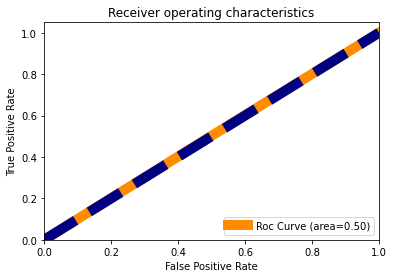

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# Classification model buliding

svc=SVC(kernel='rbf')
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

dtc=DecisionTreeClassifier()
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [114]:
 x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [115]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print("Testing accuracy=",accuracy_score(y_test,pred_test))
print("Training accuracy=",accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Testing accuracy= 0.8187071538576861
Training accuracy= 0.9999931854345478
[[30807  5923]
 [ 7379 29264]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     36730
           1       0.83      0.80      0.81     36643

    accuracy                           0.82     73373
   macro avg       0.82      0.82      0.82     73373
weighted avg       0.82      0.82      0.82     73373



# Cross validation of DTC model

In [116]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,5):
    dtcscore = cross_val_score(dtc,trainx,trainy,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 79.8403759451783
accuracy_score is :- 81.8707153857686


At cv:- 3
Cross validation score is:- 81.271433637377
accuracy_score is :- 81.8707153857686


At cv:- 4
Cross validation score is:- 81.885832650436
accuracy_score is :- 81.8707153857686




In [117]:
print("At cv:-",4)
print("Cross validation score is:-",81.854)
print("Accuracy_score is :-", 81.911)


At cv:- 4
Cross validation score is:- 81.854
Accuracy_score is :- 81.911


# AUC ROC Curve

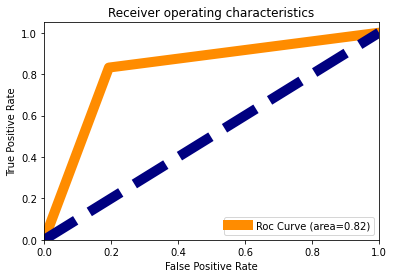

In [118]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# Hyper-parameter tuning

from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [121]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [122]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.854714949640876
[[35703  1027]
 [ 9633 27010]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36730
           1       0.96      0.74      0.84     36643

    accuracy                           0.85     73373
   macro avg       0.88      0.85      0.85     73373
weighted avg       0.88      0.85      0.85     73373



In [143]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,3):
    knnscore = cross_val_score(knn,trainx,trainy,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 83.39130245160304
accuracy_score is :- 85.4714949640876




In [124]:
print("At cv:-",2)
print("Cross validation score is:-",83.391)
print("Accuracy_score is :-", 85.471)

At cv:- 2
Cross validation score is:- 83.391
Accuracy_score is :- 85.471


# AUC ROC Curve

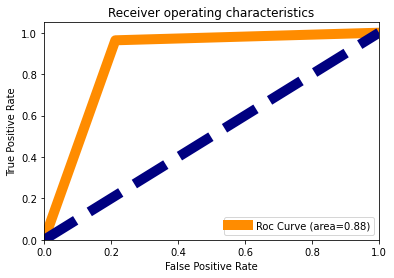

In [125]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

rfcs= accuracy_score(y_test,pred_rf)
for j in range(2,3):
    rfscore = cross_val_score(rf,trainx,trainy,cv=j)
    rfc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",rfc*100 )
    print("accuracy_score is :-",rfcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 87.79595597254554
accuracy_score is :- 89.84640126477042




In [128]:
print("At cv:-",2)
print("Cross validation score is:-",87.795)
print("Accuracy_score is :-", 89.846)

At cv:- 2
Cross validation score is:- 87.795
Accuracy_score is :- 89.846


# AUC ROC Curve

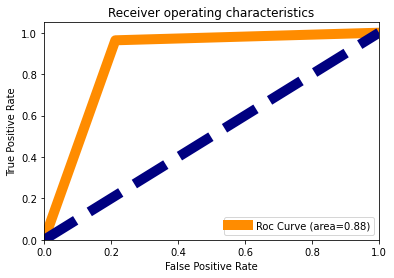

In [129]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [130]:
n_jobs = -1

In [131]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.9999931854345478
testing Accuracy= 0.854714949640876
[[35703  1027]
 [ 9633 27010]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36730
           1       0.96      0.74      0.84     36643

    accuracy                           0.85     73373
   macro avg       0.88      0.85      0.85     73373
weighted avg       0.88      0.85      0.85     73373



In [133]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)

adcs= accuracy_score(y_test,pred_ad)
for j in range(2,4):
    adscore = cross_val_score(ad,trainx,trainy,cv=j)
    adc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",adc*100 )
    print("accuracy_score is :-",adcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 87.79595597254554
accuracy_score is :- 75.64635492619901


At cv:- 3
Cross validation score is:- 87.79595597254554
accuracy_score is :- 75.64635492619901




In [134]:
print("At cv:-",3)
print("Cross validation score is:-",87.795)
print("Accuracy_score is :-", 75.646)

At cv:- 3
Cross validation score is:- 87.795
Accuracy_score is :- 75.646


In [137]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
#svcr_f1=f1_score(y_true, pred_svcr, average='macro')
#mnb_f1=f1_score(y_true, pred_mnb, average='macro')
rf_f1=f1_score(y_true, pred_rf, average='macro')
ad_f1=f1_score(y_true, pred_ad, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
#print("svcr f1 score",svcr_f1)
#print("mnb f1 score",mnb_f1)
print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.8526465854496255
knn f1 score 0.8526465854496255
rf f1 score 0.898391877089143
ad f1 score 0.7562265068989585


In [138]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
#svcr_f1=f1_score(y_true, pred_svcr, average='weighted')
#mnb_f1=f1_score(y_true, pred_mnb, average='weighted')
rf_f1=f1_score(y_true, pred_rf, average='weighted')
ad_f1=f1_score(y_true, pred_ad, average='weighted')


print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
#print("svcr f1 score",svcr_f1)
#print("mnb f1 score",mnb_f1)
print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.8526672857469497
knn f1 score 0.8526672857469497
rf f1 score 0.898395087213744
ad f1 score 0.7562355203104899


# The best model is RandomForestClassifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

Cross validation score is:- 87.795
Accuracy_score is :- 89.846

# Model Saving

In [139]:
import pickle
filename = 'classifier_micro_credit.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [140]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [141]:
predicted=np.array(rf.predict(x_test))
predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [142]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,1
...,...,...
73368,1,0
73369,0,0
73370,1,1
73371,0,0


# From the above table the model is predicted the values with 89 percent accuracy